In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
categorical_cols = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month']
numerical_cols = df.drop(['ID','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month'], axis=1)

In [ ]:
print('Describing numerical columns')
print(df[numerical_cols.columns].describe())

Describing numerical columns
            LIMIT_BAL      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count    30000.000000   30000.000000   30000.000000  3.000000e+04   
mean    167484.322667   51223.330900   49179.075167  4.701315e+04   
std     129747.661567   73635.860576   71173.768783  6.934939e+04   
min      10000.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%      50000.000000    3558.750000    2984.750000  2.666250e+03   
50%     140000.000000   22381.500000   21200.000000  2.008850e+04   
75%     240000.000000   67091.000000   64006.250000  6.016475e+04   
max    1000000.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25% 

In [ ]:
# From df.info we can see that there is no PAY_1 between PAY_0 and PAY_2
# We can rename PAY_0 to PAY_1 becasue BILL_AMT and PAY_AMT are also starting from 1
df =df.rename(columns={'PAY_0':'PAY_1'})
print(f'Column names are :', list(df.columns))

Column names are : ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [ ]:
# From the Data Description given, we know that in df.EDUCATION, 5 and 6 represents "unknown"
# Changing 6 to 5 to keep it under 1 category

df['EDUCATION'] = df['EDUCATION'].replace(6,5)

print(f'Unique values of Education columns are:',np.unique(df['EDUCATION']))

Unique values of Education columns are: [0 1 2 3 4 5]


In [ ]:
# We can drop the 'ID' column as it is irrelevant to our target column
df.drop(['ID'], axis=1, inplace=True)
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


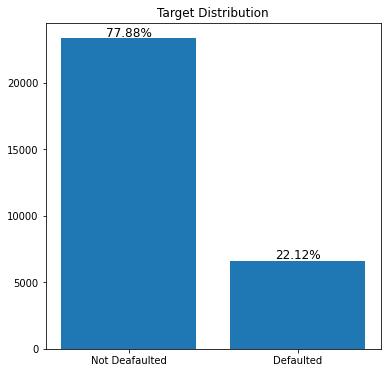

In [ ]:
# Percentage of people who have Deafulted and not Defaulted

target_count = df.groupby('default.payment.next.month').size().reset_index(name='counts')

plt.figure(figsize=(6,6))
plt.bar(target_count['default.payment.next.month'], target_count.counts)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

total = len(df['default.payment.next.month'])
not_def = len(df[df['default.payment.next.month']==0])/total *100
yes_def = len(df[df['default.payment.next.month']==1])/total *100

plt.text(x=0, y=not_def,s=str("%.2f"%not_def+'%'), fontsize=12, position=(0,len(df[df['default.payment.next.month']==0])*1.006), horizontalalignment='center')
plt.text(x=1, y=yes_def,s=str("%.2f"%yes_def+'%'), fontsize=12, position=(1,len(df[df['default.payment.next.month']==1])*1.02), horizontalalignment='center')

plt.show()

<Figure size 432x432 with 0 Axes>

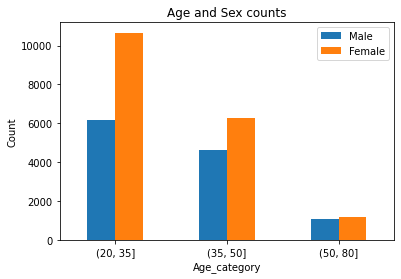

In [ ]:
df['Age_category'] = pd.cut(df.AGE, bins=[20,35,50,80])

target_count = df.groupby(['Age_category','SEX']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.title("Age and Sex counts")
plt.show()

<Figure size 432x432 with 0 Axes>

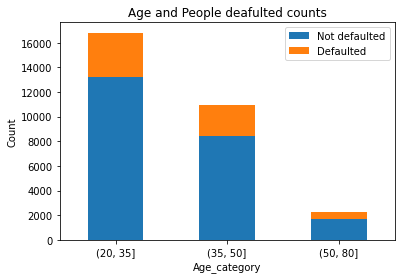

In [ ]:
target_count = df.groupby(['Age_category','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Age and People deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

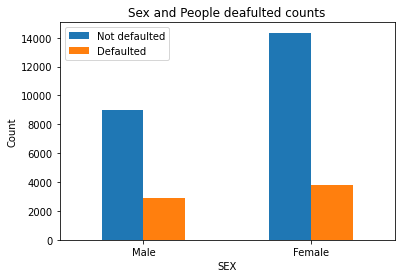

In [ ]:
target_count = df.groupby(['SEX','default.payment.next.month']).SEX.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Sex and People deafulted counts")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


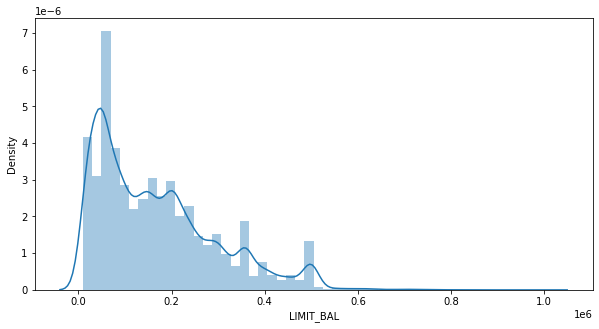

In [ ]:
plt.subplots(figsize=(10,5))
# plt.subplot(121)
sns.distplot(df.LIMIT_BAL)
plt.show()

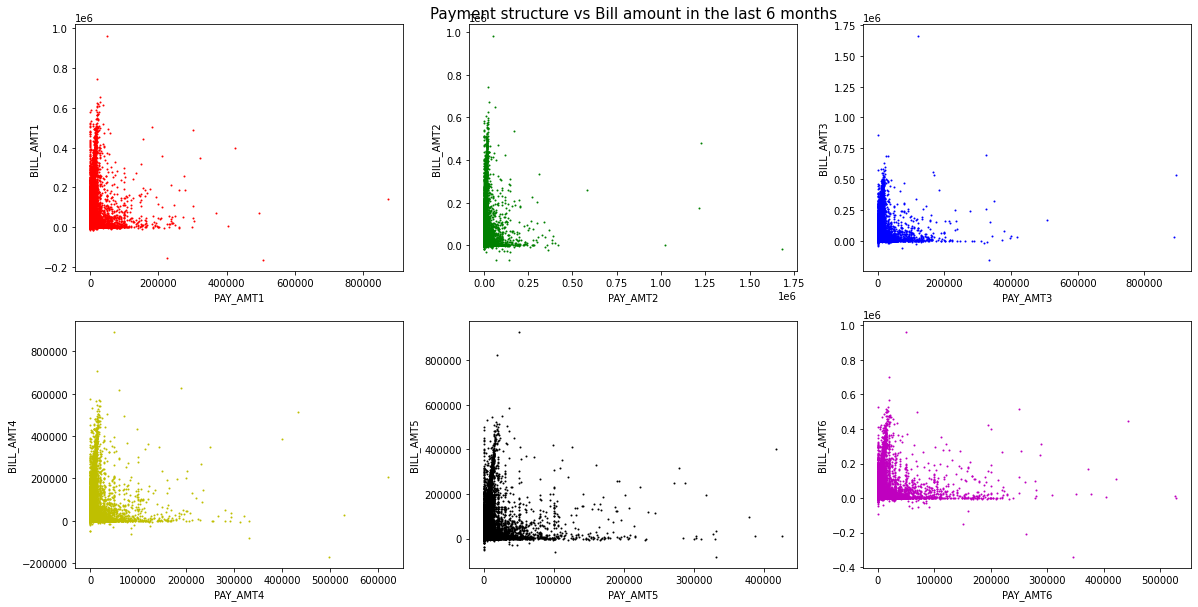

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')

plt.show()

In [ ]:
X = df.drop(['default.payment.next.month','Age_category'], axis=1)
y = df['default.payment.next.month']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24000, 23) (24000,)
(6000, 23) (6000,)


Model1 Accuracy score is : 80.11666666666667
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      4683
           1       0.74      0.15      0.24      1317

    accuracy                           0.80      6000
   macro avg       0.77      0.57      0.56      6000
weighted avg       0.79      0.80      0.74      6000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


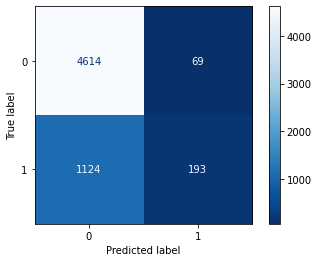

In [ ]:
model1 = RidgeClassifier()

model1.fit(X_train, y_train)

model1_acc = model1.score(X_test, y_test)*100

print('Model1 Accuracy score is :', model1_acc)

print( classification_report(y_test, model1.predict(X_test)) )

plot_confusion_matrix(model1, X_test, y_test, cmap="Blues_r")

plt.show()

Model2 Accuracy score is : 80.76666666666667
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4683
           1       0.60      0.36      0.45      1317

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


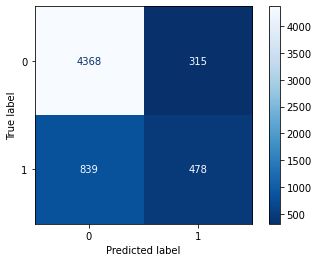

In [ ]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=10)

model2.fit(X_train, y_train)

model2_acc = model2.score(X_test, y_test)*100

print('Model2 Accuracy score is :', model2_acc)

print( classification_report(y_test, model2.predict(X_test)) )

plot_confusion_matrix(model2, X_test, y_test, cmap="Blues_r")

plt.show()

Model3 Accuracy score is : 82.48333333333333
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4683
           1       0.69      0.36      0.48      1317

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


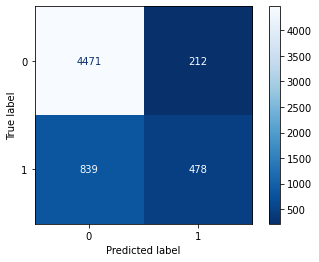

In [ ]:
model3 = RandomForestClassifier(max_depth=10)

model3.fit(X_train, y_train)

model3_acc = model3.score(X_test, y_test)*100

print('Model3 Accuracy score is :', model3_acc)

print( classification_report(y_test, model3.predict(X_test)) )

plot_confusion_matrix(model3, X_test, y_test, cmap="Blues_r")

plt.show()

In [ ]:
# Creating parameters for RandomSearch

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [50, 162, 275, 387, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomizedSearchCV(model3, param_distributions=random_grid, verbose=1, random_state=10, cv=5, n_iter=10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 162, 275, 387,
                                                         500]},
                   random_state=10, verbose=1)

Model4 Accuracy score is : 82.43333333333334
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4683
           1       0.69      0.37      0.48      1317

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


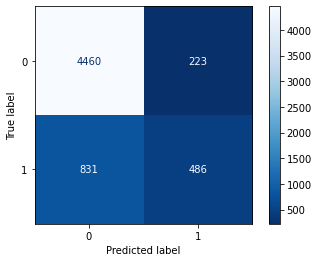

In [ ]:
model4 = rf.best_estimator_
model4_acc = model4.score(X_test,y_test)*100

print('Model4 Accuracy score is :', model4_acc)

print( classification_report(y_test, model4.predict(X_test)) )

plot_confusion_matrix(model4, X_test, y_test, cmap="Blues_r")

plt.show()

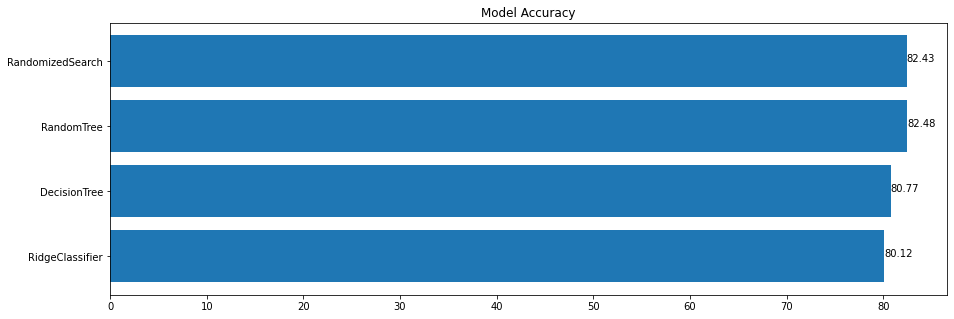

In [ ]:
models = ['RidgeClassifier', 'DecisionTree', 'RandomTree', 'RandomizedSearch']

acc = [model1_acc, model2_acc, model3_acc, model4_acc]

plt.figure(figsize=(15,5))
plt.barh(models, acc)
  
for index, value in enumerate(acc):
    plt.text(value, index,
             str("%.2f"%value))
plt.title("Model Accuracy")
plt.show()

Conclusion:

RandomTree and RandomizedSearch models have almost same values of 82%
but RandomizedSearch have better confusion matrix and better recall for 'defaulted'

In conclusion, RandomizedSearch is the best Model out of the above four